In [1]:
# Cloning the repository in the colab folder structure
%%bash
git clone https://github.com/amazzoli/ComponentSystemsData.git

Cloning into 'ComponentSystemsData'...
Updating files: 100% (17/17), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

# Changing directory where the notebook is placed
os.chdir('/content/ComponentSystemsData/datasets/lego')

sys.path.append('/content/ComponentSystemsData/py_utils/')
import plot_utils as pu

# Inspecting lego components: **colored bricks**

The table `components.tsv` contains information about lego bricks:

- **sparse_id**: identifier of the matrix coordinates in the sparse representation.
- **name**: extended name in the database https://rebrickable.com/.
- **part_id**: identifier of the shape in the dataset.
- **color_id**: identifier of the color in the dataset.
- **color**: extended color name.
- **category**: brick category.
- **material**: brick material.
- **abundance**: number of brick istances appearing in the all the lego sets.
- **occurrence**: number of lego sets in which the brick is present.

In [3]:
components = pd.read_csv('data/components.tsv', sep='\t', index_col=0)
components

,name,part_id,color_id,color,category,material,abundance,occurrence
sparse_id,,,,,,,,
0,Sticker Sheet for Set 663-1,003381,9999,[No Color/Any Color],Stickers,Plastic,1,1
69573,Sticker Sheet for Set 8186-1,86425,9999,[No Color/Any Color],Stickers,Plastic,1,1
69574,Sticker Sheet for Set 7198-1,86428,9999,[No Color/Any Color],Stickers,Plastic,1,1
69575,Sticker Sheet for Set 8185-1,86435,9999,[No Color/Any Color],Stickers,Plastic,1,1
29881,Technic Brick 6 x 8 with 4 x 6 Opening,32532,7,Light Gray,Technic Bricks,Plastic,1,1
...,...,...,...,...,...,...,...,...
21236,Plate 1 x 2,3023,0,Black,Plates,Plastic,16633,2643
62619,Technic Pin Long with Friction Ridges Lengthwi...,6558,1,Blue,Technic Pins,Plastic,16701,923
44889,Technic Axle Pin with Friction Ridges Lengthwise,43093,1,Blue,Technic Pins,Plastic,20739,2222


### Abundance statistics
Ranked abundances (Zipf's law) and abundance distribution

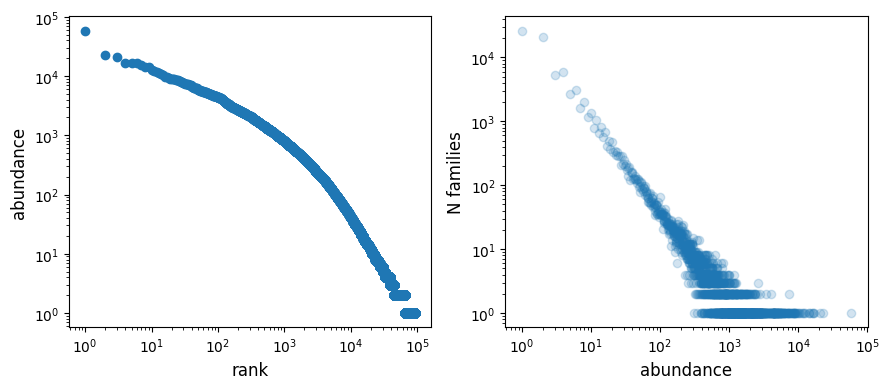

In [4]:
abundances = components.abundance.values

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,4))

ax1 = pu.plot_count_rank(ax1, abundances, ylabel='abundance')

ax2 = pu.plot_count_hist_nobin(ax2, abundances, alpha=0.2, xlabel='abundance', ylabel='N families')

plt.tight_layout()

### Sharing statistics

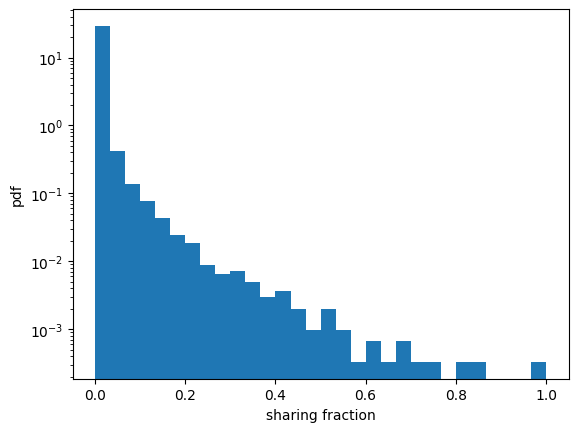

In [5]:
sharing_frac = components.occurrence / max(components.occurrence)

plt.yscale('log')
plt.xlabel('sharing fraction')
plt.ylabel('pdf')
h = plt.hist(sharing_frac, bins=30, density=True)

### LEGO bricks counts of categories

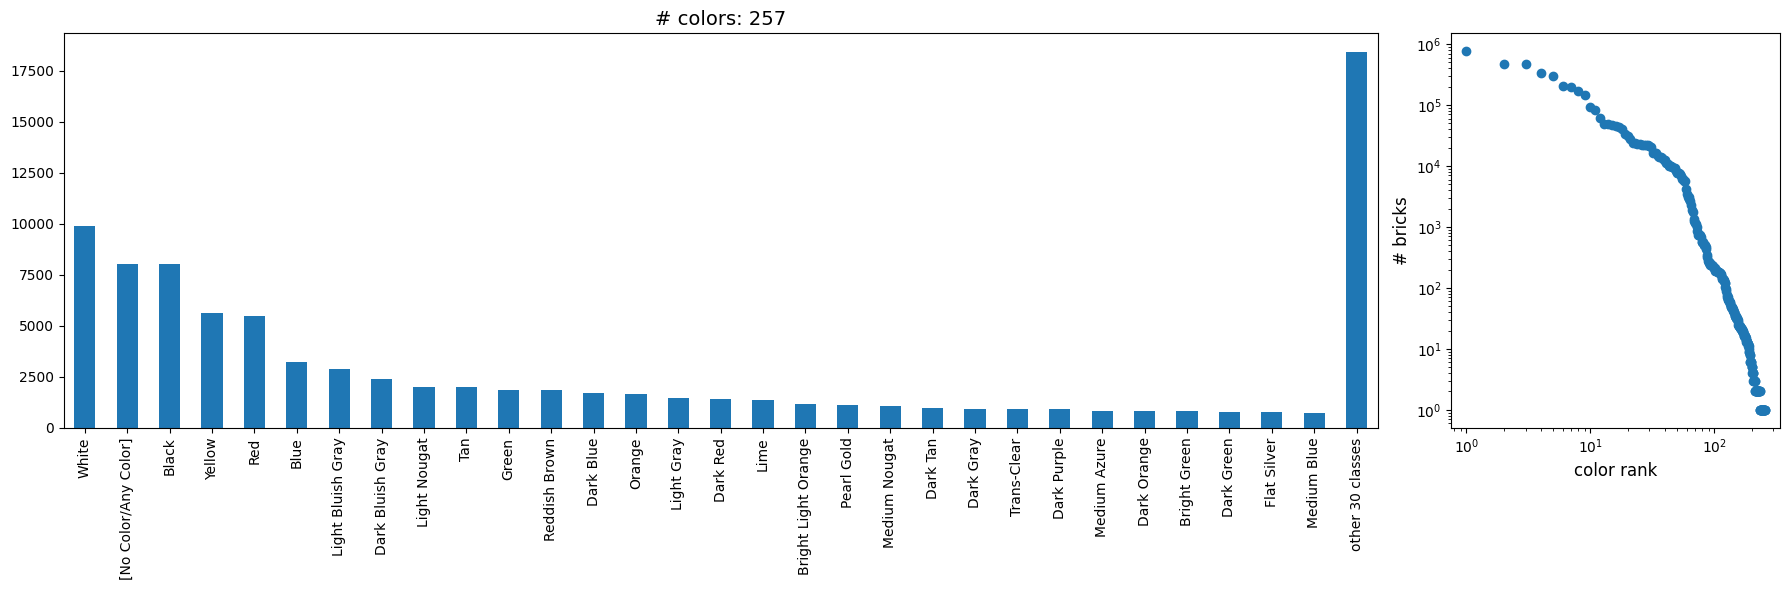

In [6]:
n_uniq_colors = components['color'].value_counts()
ab_colors = components.groupby('color').agg({'abundance':"sum"}).abundance

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 6), gridspec_kw={'width_ratios': [4, 1]})
ax1 = pu.plot_sorted_bar(ax1, n_uniq_colors, n_classes=30)
ax1.set_title('# colors: '+str(len(n_uniq_colors)), fontsize=14)
ax2 = pu.plot_count_rank(ax2, ab_colors.values, xlabel='color rank', ylabel='# bricks')
plt.tight_layout()

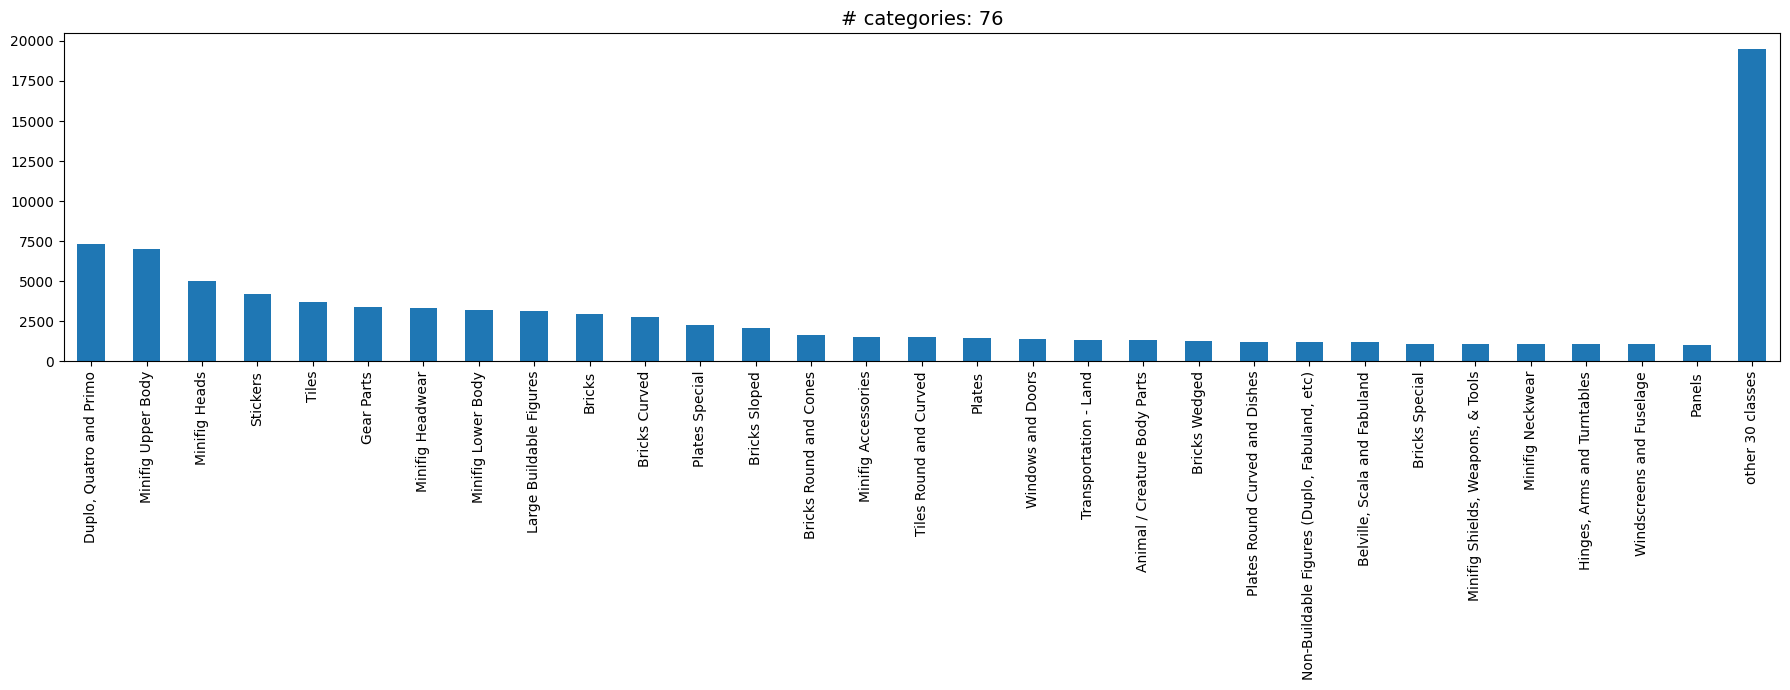

In [7]:
n_uniq_categs = components['category'].value_counts()

fig, ax1 = plt.subplots(1,1,figsize=(18, 7))
ax1.set_title('# categories: '+str(len(n_uniq_categs)), fontsize=14)
ax1 = pu.plot_sorted_bar(ax1, n_uniq_categs, n_classes=30)
plt.tight_layout()